<a href="https://colab.research.google.com/github/IAMLATI/Firstproj/blob/main/FashionMnist2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as transform
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dset

In [2]:
# config device
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:
#hyperparameters
"""input_size=256
hidden_size=100
num_classes=10"""
num_epochs=4
batch_size=256
learning_rate=0.03

In [4]:
transform= transforms.Compose(
    [transforms.ToTensor(),
     
     transforms.Normalize((0.5), (0.5))])
train_dataset=dset.FashionMNIST(root='./data', train=True, transform=transform, download=True)

test_dataset=dset.FashionMNIST(root='./data', train=False, transform=transform, download=True )

train_loader=DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_loader=DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

classes=('T-shirt/top','Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot')


In [5]:
train_dataset.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [6]:
examples=iter(train_loader)
samples, labels=next(examples)
print(samples.shape,labels.shape)

torch.Size([256, 1, 28, 28]) torch.Size([256])


In [7]:
len(examples)

235

In [8]:
testaa=next(iter(train_dataset))

In [9]:
len(testaa)

2

In [10]:
print(len(train_loader))

235


In [11]:
len(train_dataset)

60000

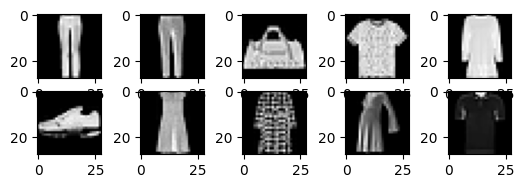

In [12]:
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.imshow(samples[i][0], cmap='gray')

In [13]:
"""def imshow(img):
    img=img/2 + 0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
dataiter=iter(train_loader)
images, labels=next(dataiter)
imshow(torchvision.utils.make_grid(images))"""

'def imshow(img):\n    img=img/2 + 0.5\n    npimg=img.numpy()\n    plt.imshow(np.transpose(npimg,(1,2,0)))\n    plt.show()\ndataiter=iter(train_loader)\nimages, labels=next(dataiter)\nimshow(torchvision.utils.make_grid(images))'

In [14]:
"""class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1=nn.Conv2d(1,6,5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1=nn.Linear(16*4*4,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=x.view(-1,16*4*4)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)

    return x

model=ConvNet().to(device)

criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)"""

"""conv1=nn.Conv2d(3,6,5)
pool=nn.MaxPool2d(2,2)
conv2=nn.Conv2d(6,16,5)
print(images.shape)
x=conv1(images)
x=pool(x)
x=conv2(x)
x=pool(x)"""


'conv1=nn.Conv2d(3,6,5)\npool=nn.MaxPool2d(2,2)\nconv2=nn.Conv2d(6,16,5)\nprint(images.shape)\nx=conv1(images)\nx=pool(x)\nx=conv2(x)\nx=pool(x)'

In [15]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 4 * 4)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Finished Training


In [17]:
"""#training_loop
n_total_steps= len(train_loader)
for epoch in range (num_epochs):
  for i, (images, labels) in enumerate(train_loader):

      
    images=images.to(device)
    labels=labels.to(device)

    outputs=model(images)
    loss=criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if (i+1)%2000==0:
      print(f'epoch{epoch+1}/{num_epochs}, step{i+1}/{n_total_steps}, loss{loss.item():.4f}')"""

"#training_loop\nn_total_steps= len(train_loader)\nfor epoch in range (num_epochs):\n  for i, (images, labels) in enumerate(train_loader):\n\n      \n    images=images.to(device)\n    labels=labels.to(device)\n\n    outputs=model(images)\n    loss=criterion(outputs, labels)\n\n    optimizer.zero_grad()\n    loss.backward()\n    optimizer.step()\n\n\n    if (i+1)%2000==0:\n      print(f'epoch{epoch+1}/{num_epochs}, step{i+1}/{n_total_steps}, loss{loss.item():.4f}')"

In [18]:
print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Finished Training


In [19]:
#test_loop
with torch.no_grad():
  n_correct=0
  n_samples=0
  n_class_correct=[0 for i in range(10)]
  n_class_samples=[0 for i in range(10)]

  for images, labels in test_loader:
    images=images.to(device)
    labels=labels.to(device)

    outputs=model(images)

    _, predicted=torch.max(outputs,1)
    n_samples+=labels.size(0)
    n_correct+=(predicted==labels).sum().item()

    for i in range(len(labels)):
      label = labels[i]
      pred = predicted[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  acc=100.0* n_correct/n_samples
  print(f'Accuracy of the network:{acc}')

  for i in range(10):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')



Accuracy of the network:71.45
Accuracy of T-shirt/top: 79.5 %
Accuracy of Trouser: 95.7 %
Accuracy of Pullover: 67.4 %
Accuracy of Dress: 50.9 %
Accuracy of Coat: 80.6 %
Accuracy of Sandal: 75.2 %
Accuracy of Shirt: 14.0 %
Accuracy of Sneaker: 57.3 %
Accuracy of Bag: 96.2 %
Accuracy of Ankle boot: 97.7 %
